Columns in dataset: Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')
Monthly sales data:
          ds          y
0 2015-01-31  14205.707
1 2015-02-28   4519.892
2 2015-03-31  55205.797
3 2015-04-30  27906.855
4 2015-05-31  23644.303


C:\Users\aishk\AppData\Local\Temp\ipykernel_13376\1059599206.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.groupby(pd.Grouper(key='Order Date', freq='M'))['Sales'].sum().reset_index()
13:01:15 - cmdstanpy - INFO - Chain [1] start processing
13:01:18 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\aishk\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


forecast.csv file created successfully!


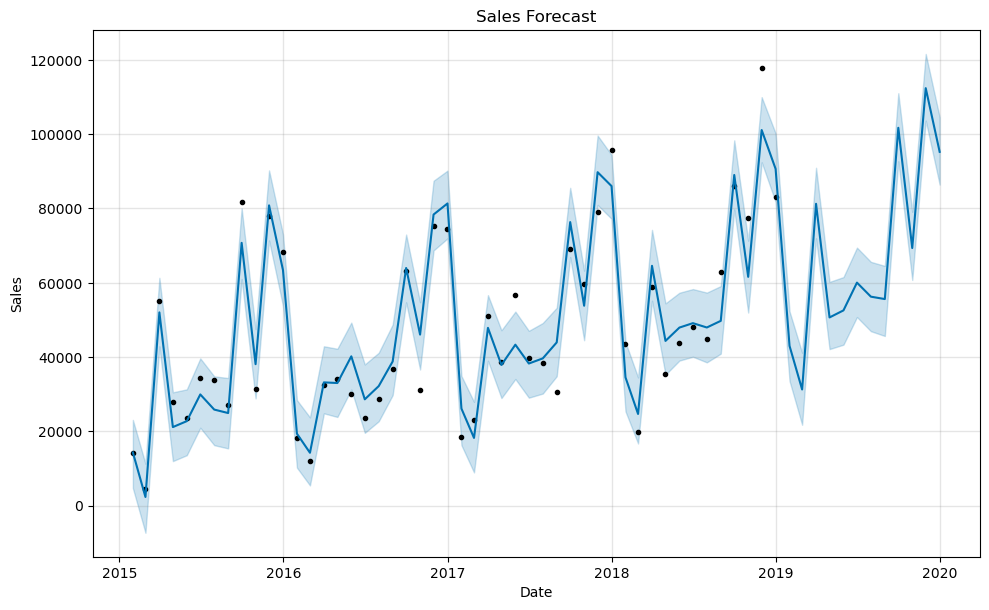

In [6]:
# Install Prophet (run only once)
!pip install prophet

import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Load dataset (CHANGE PATH if needed)
df = pd.read_csv(r"C:/Users/aishk/OneDrive/Desktop/Sales_forecast_project/train.csv")

# Show columns
print("Columns in dataset:", df.columns)

# Convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y', errors='coerce')
df = df.sort_values('Order Date')

# Remove missing values
df = df.dropna(subset=['Order Date','Sales'])

# Create monthly sales data
monthly_sales = df.groupby(pd.Grouper(key='Order Date', freq='M'))['Sales'].sum().reset_index()

# Rename for Prophet
monthly_sales.columns = ['ds','y']

print("Monthly sales data:")
print(monthly_sales.head())

# Train Prophet model
model = Prophet()
model.fit(monthly_sales)

# Create future dates (next 12 months)
future = model.make_future_dataframe(periods=12, freq='M')

# Predict
forecast = model.predict(future)

# Save forecast to CSV
forecast[['ds','yhat','yhat_lower','yhat_upper']].to_csv("forecast.csv", index=False)

print("forecast.csv file created successfully!")

# Plot forecast
model.plot(forecast)
plt.title("Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()
